<a href="https://colab.research.google.com/github/Mudassir4545/Yearly-Sales-Analysis-of-Walmart/blob/main/EDA_Sales_Data_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd

## Merge data from each month into one CSV

In [ ]:
path = "/content/drive/MyDrive/Sales_Data"
# files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

# for file in files:
#   print(file)

In [ ]:
# Merging data of all 12 Months in 1 single file

# all_months_data = pd.DataFrame()

# for file in files:
#     current_data = pd.read_csv(path+"/"+file)
#     all_months_data = pd.concat([all_months_data, current_data])
    
# all_months_data.to_csv(path + "/all_data_copy.csv", index=False)

In [ ]:
all_data = pd.read_csv(path+"/all_data_copy.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [ ]:
all_data.shape

(186850, 6)

In [ ]:
all_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [ ]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

## Clean up the data!
### The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

Drop rows containing missing(NAN) values

In [ ]:
# to find if there is any Null value in DF. If there is any it will return "True" else "False"
all_data.isna().any().any()

True

In [ ]:
# Returns total No. of missing(NAN) values
all_data.isna().sum().sum()

3270

In [ ]:
# Find the exact rows that contain missing(NAN)values
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
312,NaN,NaN,NaN,NaN,NaN,NaN
1222,NaN,NaN,NaN,NaN,NaN,NaN
2648,NaN,NaN,NaN,NaN,NaN,NaN
2685,NaN,NaN,NaN,NaN,NaN,NaN
3119,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [ ]:
# all_data['Month'] = all_data['Order Date'].str[0:2]
# all_data['Month'] = all_data['Month'].astype('int32')
# all_data.head()

## Get rid of text in order date column

In [ ]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

## Make columns correct type

In [ ]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

## Augment data with additional columns

###Add month column

In [ ]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8


## Data Exploration!

### Question 1: What was the best month for sales? How much was earned that month?

In [ ]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [ ]:
all_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


range(1, 13)


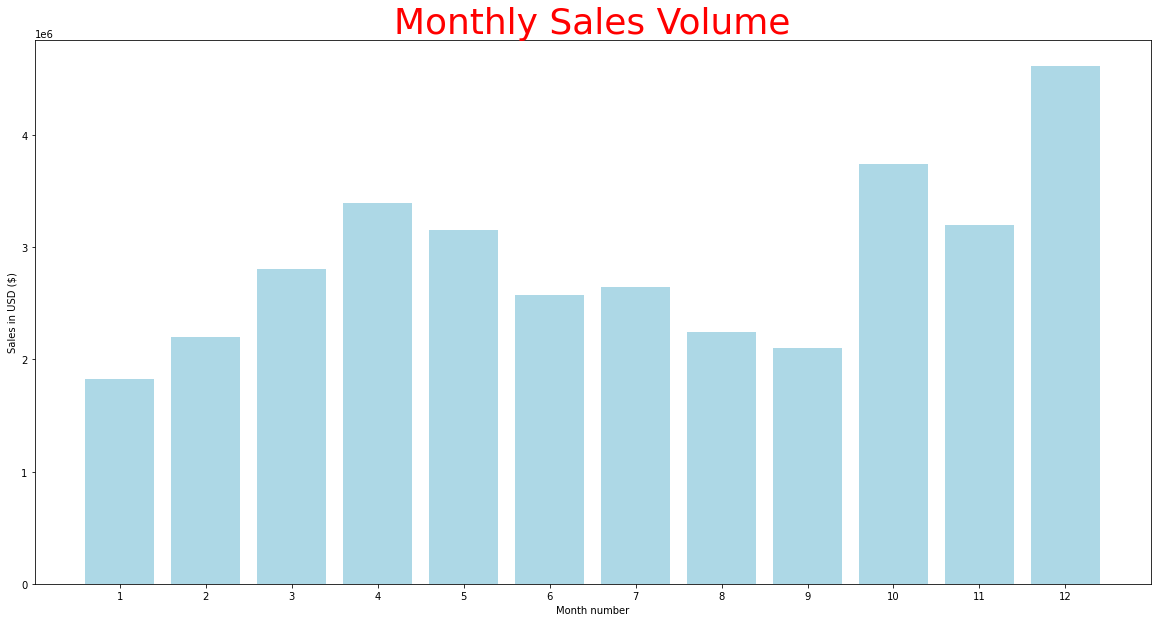

In [ ]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.figure(figsize=(20,10))

plt.title('Monthly Sales Volume', size=36, color='r')

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'],color='lightblue')
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

##Question 2: What city has the highest No. of Sales?

### Add a City Column

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68


In [ ]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle (WA)
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas (TX)
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland (OR)
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles (CA)
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City (NY)


In [ ]:
all_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


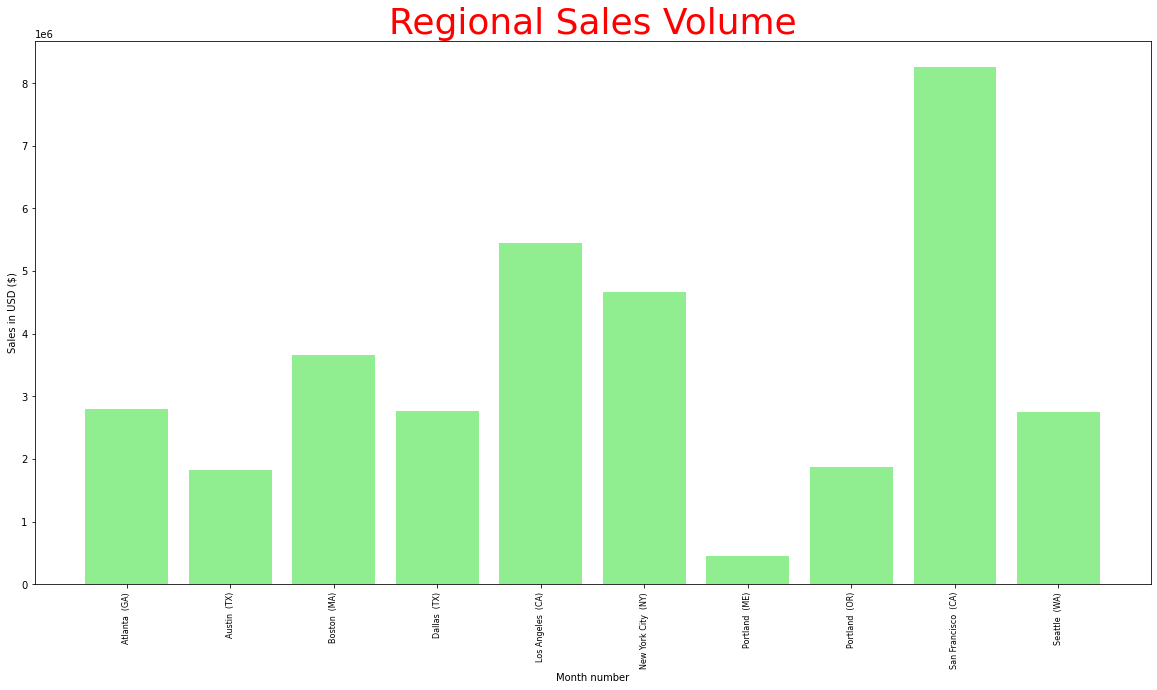

In [ ]:
keys = [city for city, df in all_data.groupby(['City'])]
plt.figure(figsize=(20,10))


plt.title('Regional Sales Volume', size=36, color='r')

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'], color='lightgreen')
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

## Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [ ]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle (WA),22,21,1
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas (TX),15,11,1
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland (OR),14,40,1
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles (CA),20,59,1
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City (NY),19,53,1


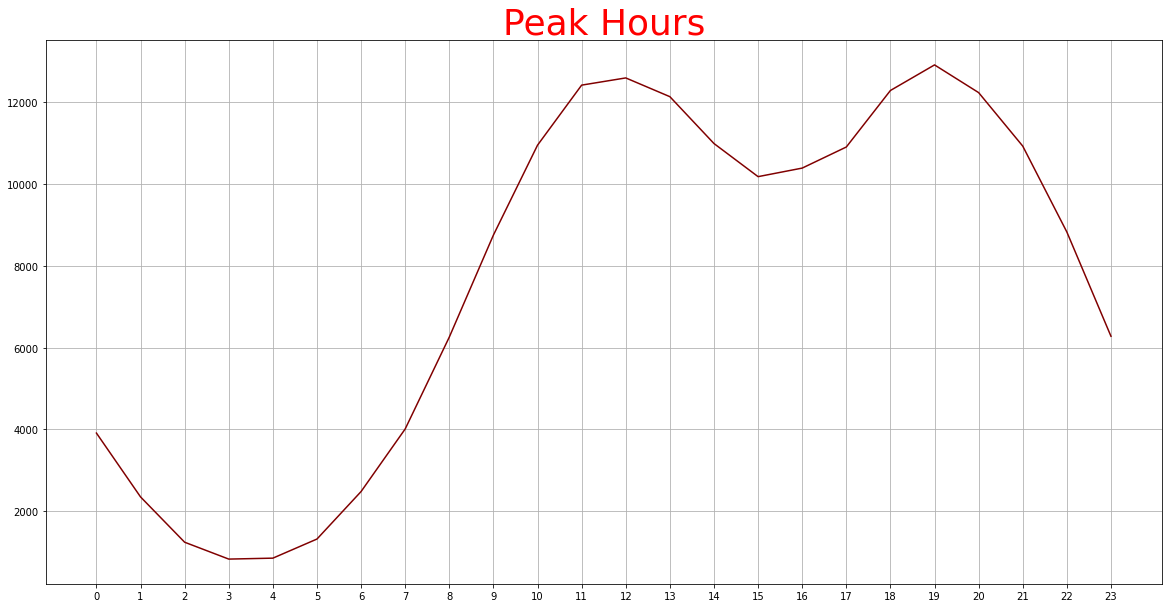

In [ ]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]
plt.figure(figsize=(20,10))

plt.title('Peak Hours', size=36, color='r')

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'], color='maroon')
plt.xticks(keys)
plt.grid()
plt.show()

## Question 4: What products are most often sold together, what is the sale volume per product and what is the avg. price of each product?

In [ ]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(30)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
46,236716,AA Batteries (4-pack),2,3.84,08/17/19 20:12,"84 Cedar St, San Francisco, CA 94016",8,7.68,San Francisco (CA),20,12,1
47,236716,USB-C Charging Cable,1,11.95,08/17/19 20:12,"84 Cedar St, San Francisco, CA 94016",8,11.95,San Francisco (CA),20,12,1
60,236729,iPhone,1,700.00,08/09/19 09:28,"635 Lake St, San Francisco, CA 94016",8,700.00,San Francisco (CA),9,28,1
61,236729,Apple Airpods Headphones,1,150.00,08/09/19 09:28,"635 Lake St, San Francisco, CA 94016",8,150.00,San Francisco (CA),9,28,1
62,236730,Google Phone,1,600.00,08/02/19 10:17,"445 Lincoln St, New York City, NY 10001",8,600.00,New York City (NY),10,17,1
63,236730,Wired Headphones,1,11.99,08/02/19 10:17,"445 Lincoln St, New York City, NY 10001",8,11.99,New York City (NY),10,17,1
132,236799,Google Phone,1,600.00,08/01/19 12:38,"309 2nd St, San Francisco, CA 94016",8,600.00,San Francisco (CA),12,38,1
133,236799,Wired Headphones,1,11.99,08/01/19 12:38,"309 2nd St, San Francisco, CA 94016",8,11.99,San Francisco (CA),12,38,1
163,236829,Vareebadd Phone,1,400.00,08/16/19 08:51,"27 2nd St, Los Angeles, CA 90001",8,400.00,Los Angeles (CA),8,51,1
164,236829,USB-C Charging Cable,1,11.95,08/16/19 08:51,"27 2nd St, Los Angeles, CA 90001",8,11.95,Los Angeles (CA),8,51,1


In [ ]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count,Grouped
46,236716,AA Batteries (4-pack),2,3.84,08/17/19 20:12,"84 Cedar St, San Francisco, CA 94016",8,7.68,San Francisco (CA),20,12,1,"AA Batteries (4-pack),USB-C Charging Cable"
47,236716,USB-C Charging Cable,1,11.95,08/17/19 20:12,"84 Cedar St, San Francisco, CA 94016",8,11.95,San Francisco (CA),20,12,1,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,iPhone,1,700.00,08/09/19 09:28,"635 Lake St, San Francisco, CA 94016",8,700.00,San Francisco (CA),9,28,1,"iPhone,Apple Airpods Headphones"
61,236729,Apple Airpods Headphones,1,150.00,08/09/19 09:28,"635 Lake St, San Francisco, CA 94016",8,150.00,San Francisco (CA),9,28,1,"iPhone,Apple Airpods Headphones"
62,236730,Google Phone,1,600.00,08/02/19 10:17,"445 Lincoln St, New York City, NY 10001",8,600.00,New York City (NY),10,17,1,"Google Phone,Wired Headphones"


In [ ]:
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2

,Order ID,Grouped
46,236716,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,"iPhone,Apple Airpods Headphones"
62,236730,"Google Phone,Wired Headphones"
132,236799,"Google Phone,Wired Headphones"
163,236829,"Vareebadd Phone,USB-C Charging Cable"
...,...,...
186667,295487,"Apple Airpods Headphones,Macbook Pro Laptop"
186694,295513,"iPhone,Lightning Charging Cable"
186708,295526,"Apple Airpods Headphones,27in FHD Monitor"
186717,295534,"Google Phone,USB-C Charging Cable"


In [ ]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


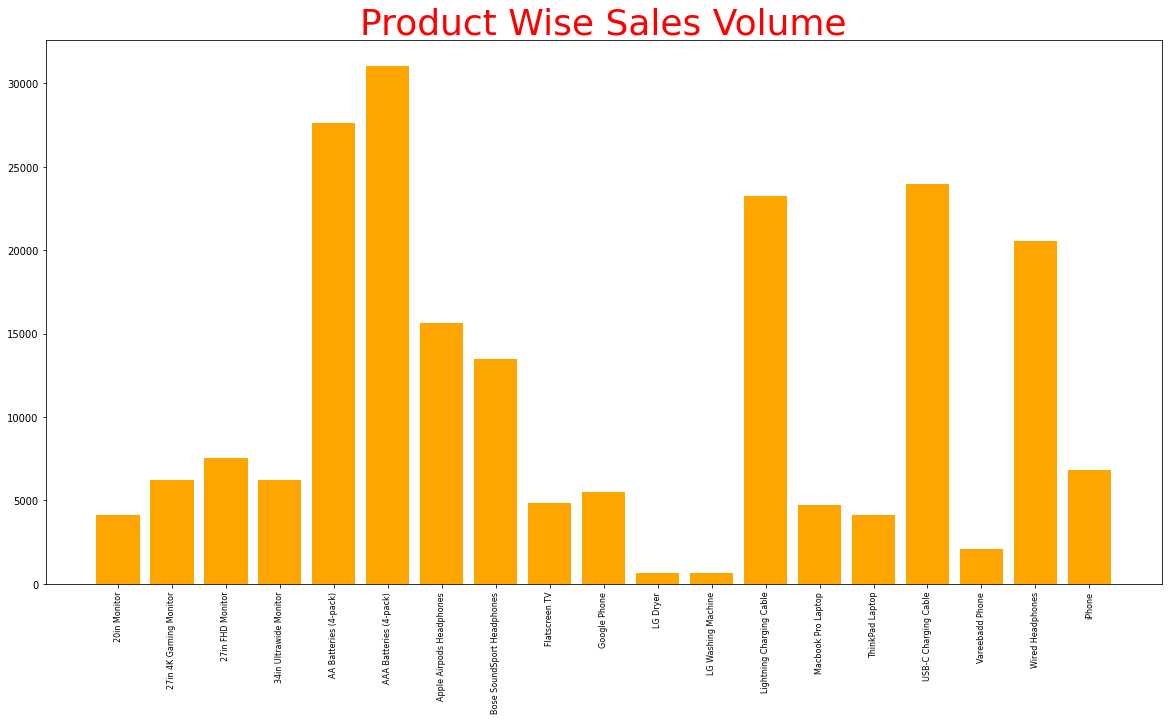

In [ ]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']


keys = [pair for pair, df in product_group]
plt.figure(figsize=(20,10))
plt.title('Product Wise Sales Volume', size=36, color='r')
plt.bar(keys, quantity_ordered, color='orange')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

## Finding %age Sales Volume of each product

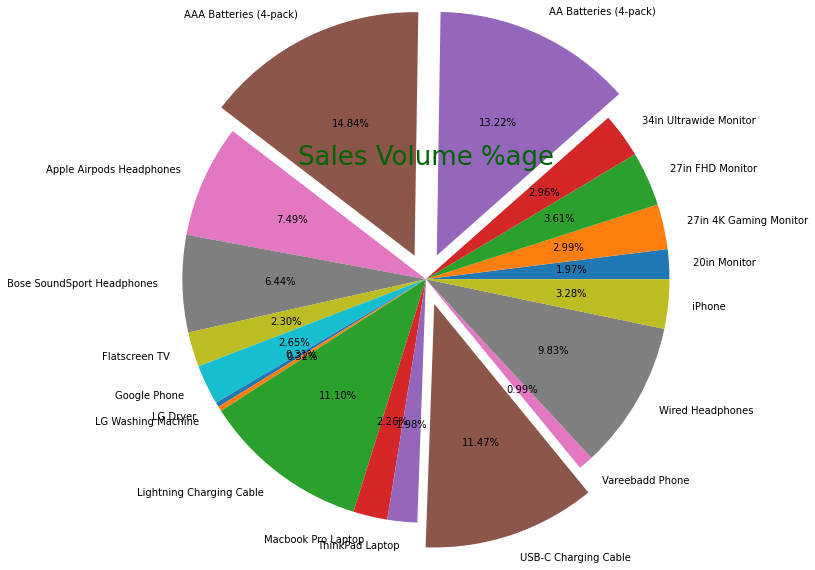

In [ ]:
# product_group = all_data.groupby('Product')
# quantity_ordered = product_group.sum()['Quantity Ordered']

# keys = [pair for pair, df in product_group]

plt.title('Sales Volume %age', size=26, color='darkgreen')
y = quantity_ordered
mylabels = keys
# plt.figure(figsize=(20,20))
plt.pie(y, labels = mylabels, radius=2.8, autopct='%0.2f%%', explode=[0,0,0,0.,0.3,0.3,0,0,0,0,0,0,0,0,0,0.3,0,0,0])
plt.show()

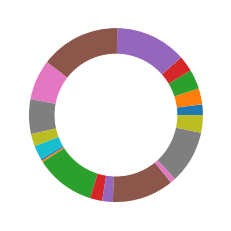

In [ ]:
# create data
size_of_groups=quantity_ordered

# Create a pieplot
plt.pie(size_of_groups)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()


# This is your assignment to go in matplotlib documentation, read the parameter description and adjust this donut chart according to your understanding 
# in way that it will tell some meaningful insights about the data

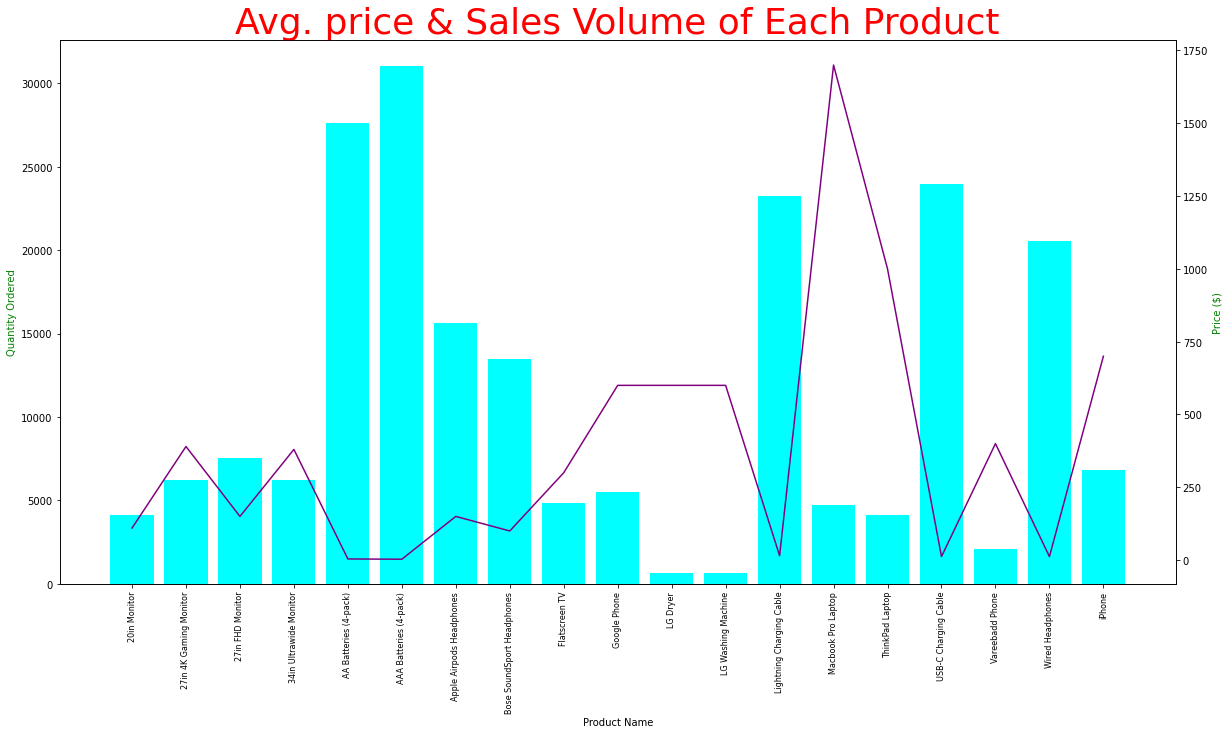

In [ ]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots(figsize=(20,10))
plt.title('Avg. price & Sales Volume of Each Product', size=36, color='r')

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='aqua')
ax2.plot(keys, prices, color='purple')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='g')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

In [ ]:
\